# Risk Prediction Of Cardiovascular Disease

### importing librarires-

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import LabelEncoder 
import scipy.stats as stats 
import warnings 
warnings.filterwarnings('ignore') 

In [8]:
df=pd.read_csv("CVD_cleaned.csv")
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,m,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


In [9]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poo,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [10]:
df.shape

(308854, 19)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  int64  
 12  Weight_(kg)                   308854 non-nul

In [12]:
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [13]:
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(80)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df['General_Health'] = df['General_Health'].replace({'poo': 'Poor'})
df['General_Health'] = df['General_Health'].replace({'Poo': 'Poor'})

In [195]:
df['Sex'] = df['Sex'].replace({'F': 'Female'})
df['Sex'] = df['Sex'].replace({'m': 'Male'})
df['Sex'] = df['Sex'].replace({'M': 'Male'})

In [ ]:
#plotting a countplot
plt.figure(figsize=(6,4))
sns.countplot(df['Exercise'],palette=["#CBAACB", "#E6CCE6"])
plt.show()

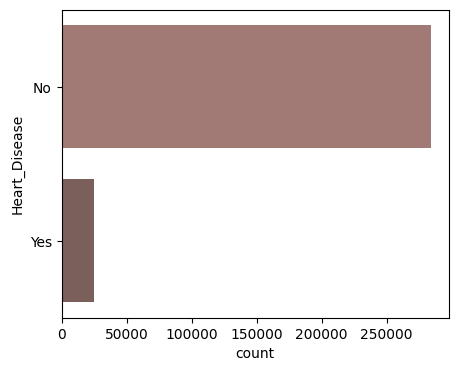

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(df['Heart_Disease'],palette=["#a9746e", "#805b56"])
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df['Skin_Cancer'],palette=["#6BAED6", "#2171B5"])
plt.show()

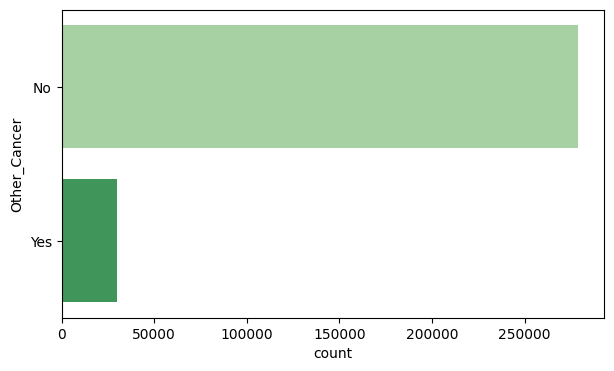

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(df['Other_Cancer'],palette=["#A1D99B", "#31A354"])
plt.show()

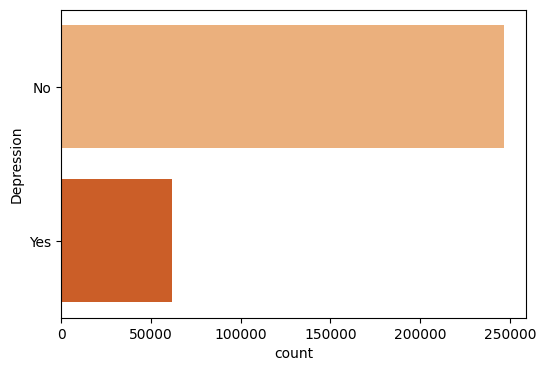

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(df['Depression'],palette=["#FDAE6B", "#E6550D"])
plt.show()

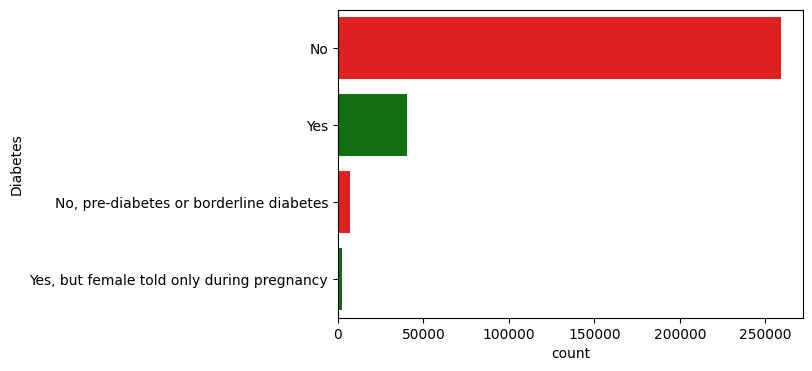

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(df['Diabetes'],palette=['r','g'])
plt.show()

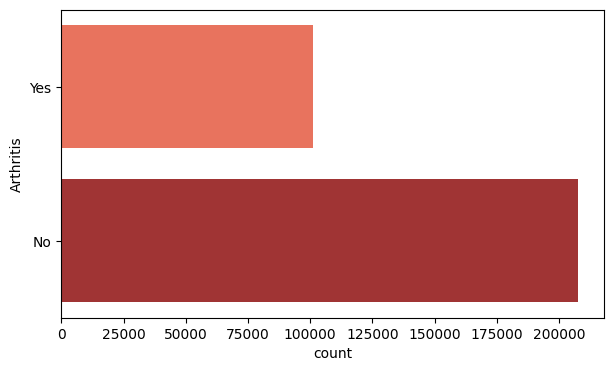

In [25]:
plt.figure(figsize=(7,4))
sns.countplot(df['Arthritis'],palette=["#FF6347", "#B22222"])
plt.show()

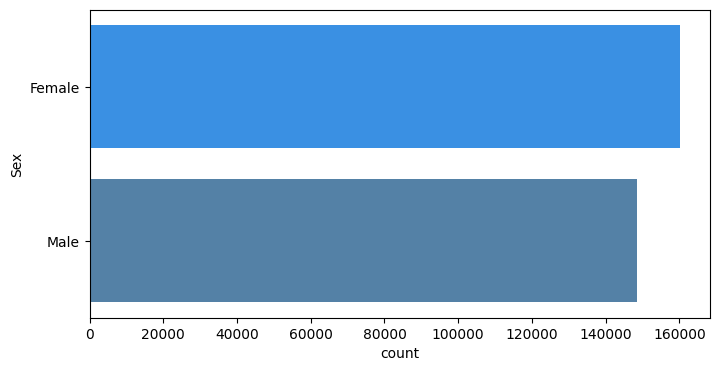

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(df['Sex'],palette=["#1E90FF", "#4682B4"])
plt.show()

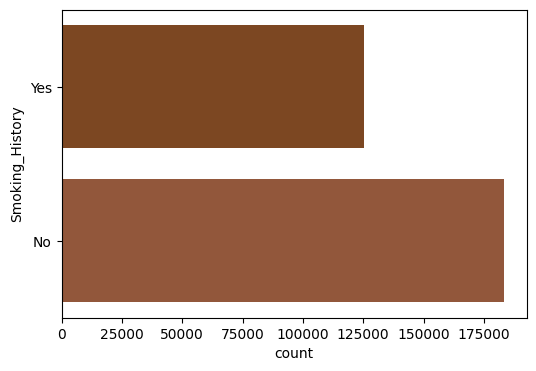

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(df['Smoking_History'],palette=["#8B4513", "#A0522D"] )
plt.show()

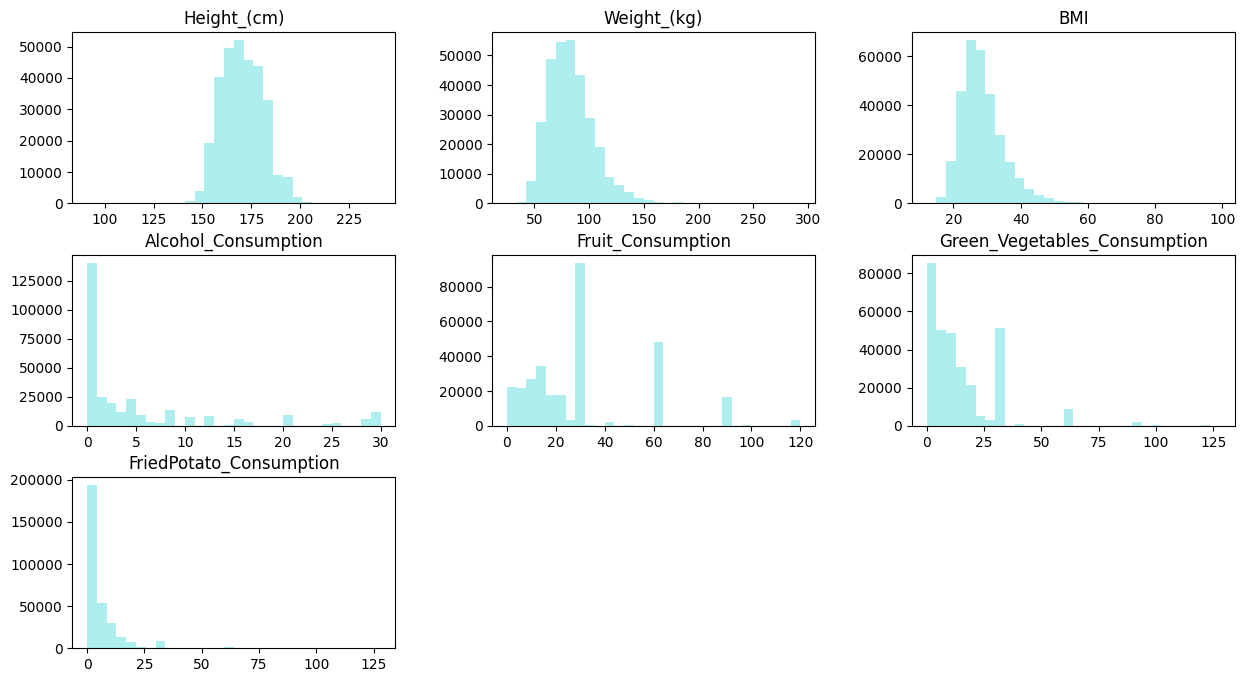

In [28]:
df.hist(bins=30, figsize=(15, 8), color="#AFEEEE", grid=False)
plt.show()

# finding outliers 

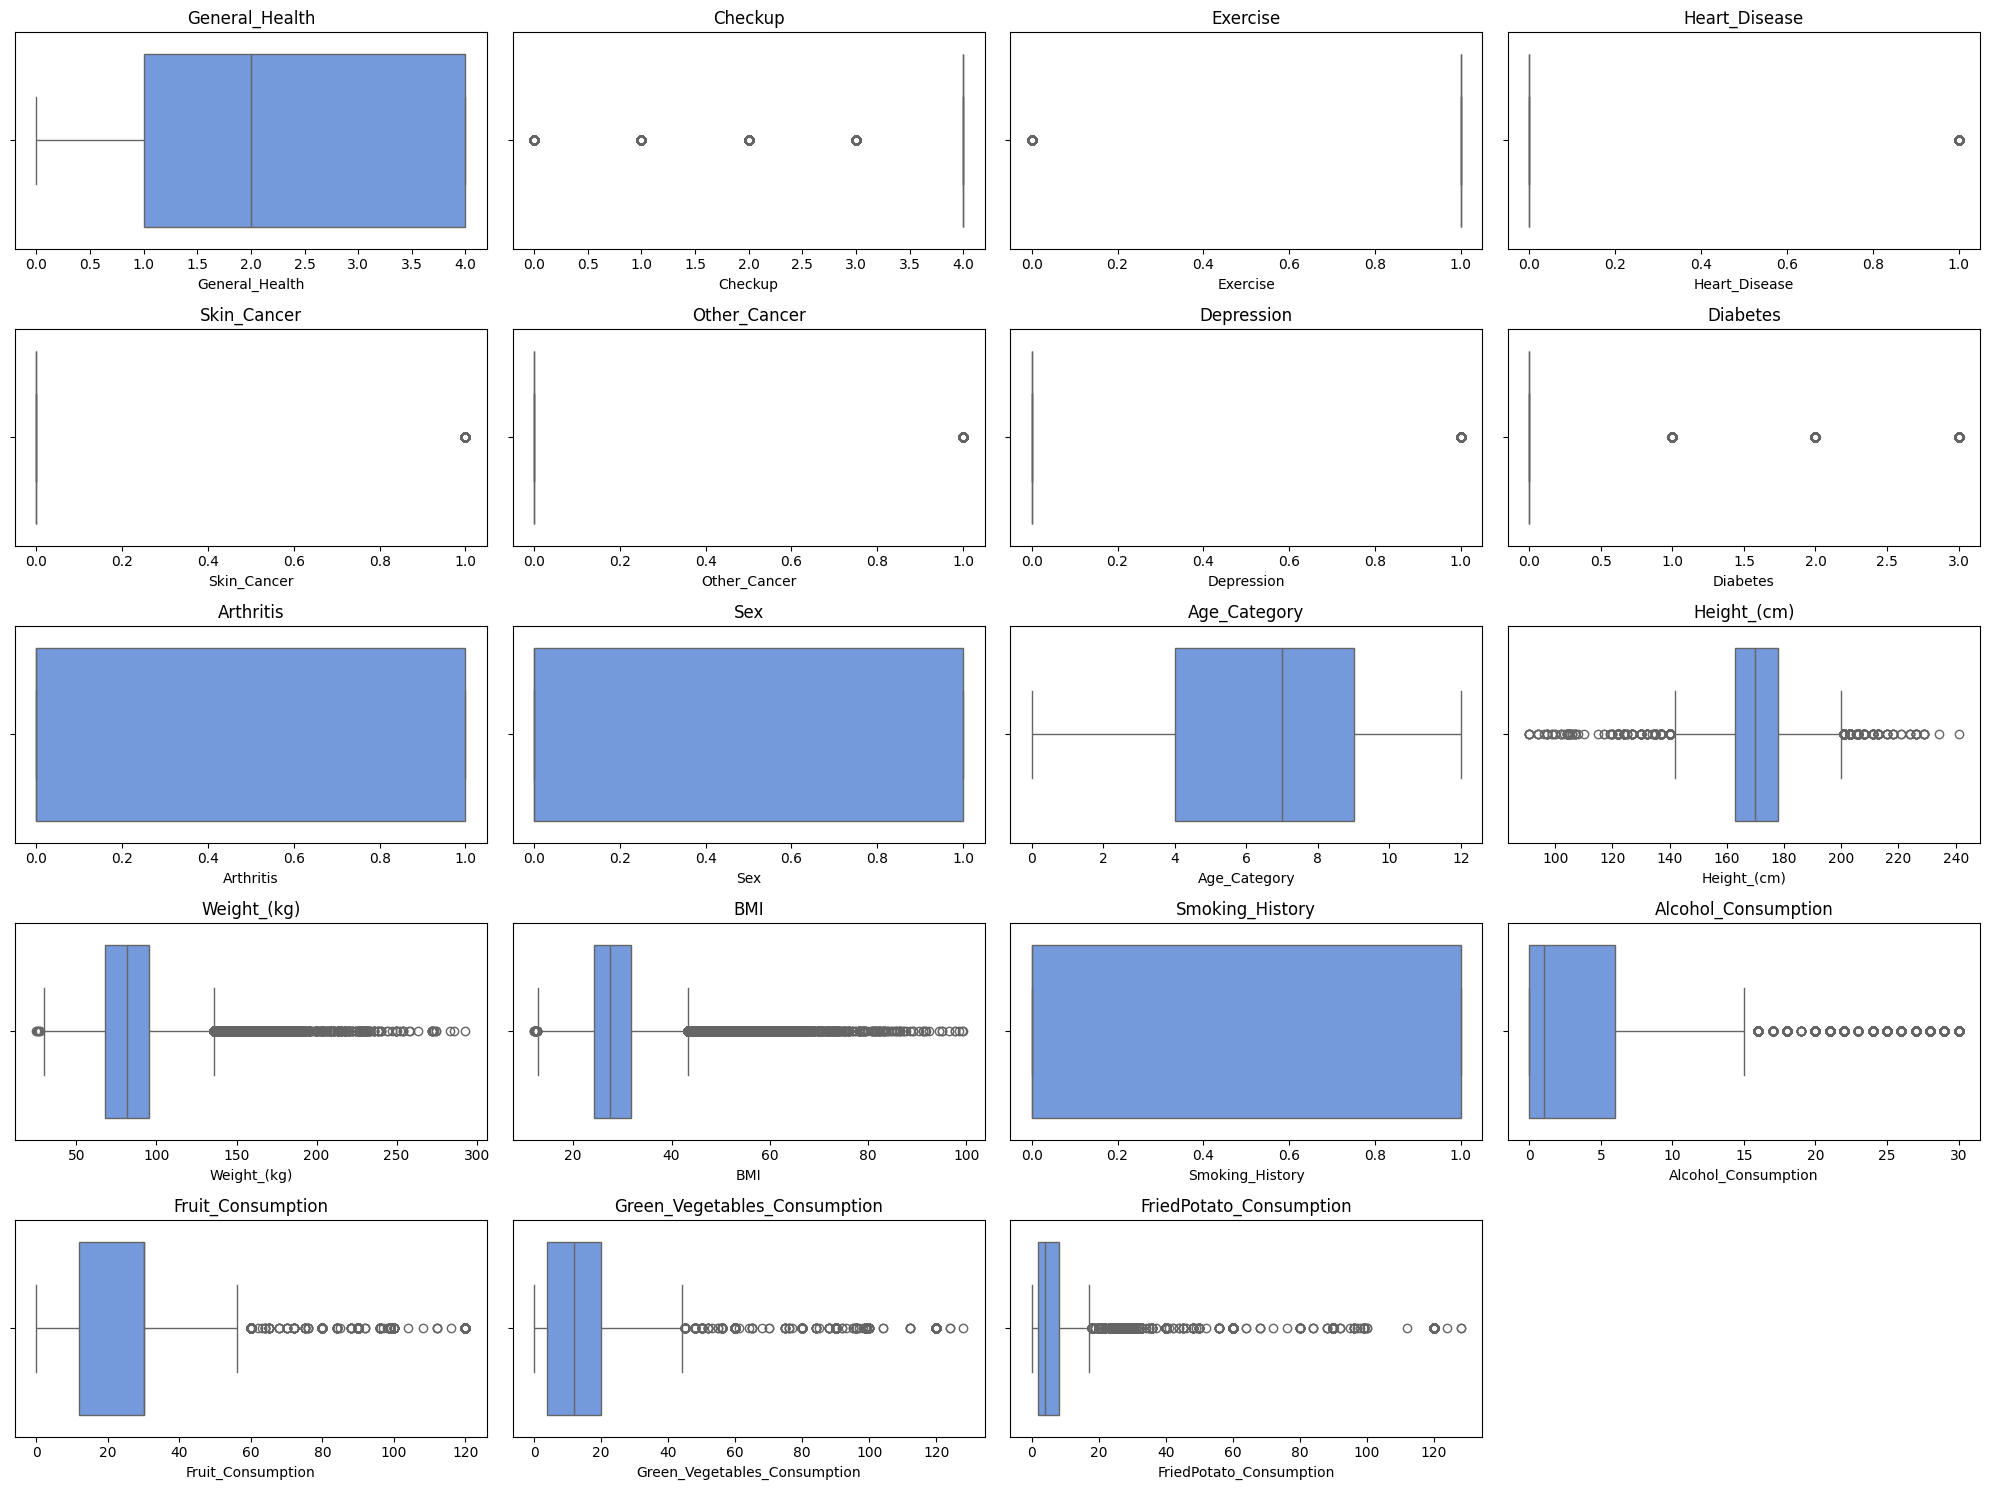

In [99]:
numerical_cols = df.select_dtypes(include='number').columns

# Plot box plots for each numerical column
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 3) // 4, 4, i + 1)
    sns.boxplot(x=df[col], color='#6495ED')
    plt.title(col)
plt.tight_layout()
plt.show()

In [87]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [31]:
df['General_Health']=encoder.fit_transform(df['General_Health'])
df['Checkup']=encoder.fit_transform(df['Checkup'])
df['Exercise']=encoder.fit_transform(df['Exercise'])
df['Heart_Disease']=encoder.fit_transform(df['Heart_Disease'])
df['Skin_Cancer']=encoder.fit_transform(df['Skin_Cancer'])
df['Other_Cancer']=encoder.fit_transform(df['Other_Cancer'])
df['Depression']=encoder.fit_transform(df['Depression'])
df['Diabetes']=encoder.fit_transform(df['Diabetes'])
df['Arthritis']=encoder.fit_transform(df['Arthritis'])
df['Sex']=encoder.fit_transform(df['Sex'])
df['Age_Category']=encoder.fit_transform(df['Age_Category'])
df['Smoking_History']=encoder.fit_transform(df['Smoking_History'])

In [32]:
q1=df.quantile(0.25)
q1

General_Health                    1.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        0.00
Diabetes                          0.00
Arthritis                         0.00
Sex                               0.00
Age_Category                      4.00
Height_(cm)                     163.00
Weight_(kg)                      68.04
BMI                              24.21
Smoking_History                   0.00
Alcohol_Consumption               0.00
Fruit_Consumption                12.00
Green_Vegetables_Consumption      4.00
FriedPotato_Consumption           2.00
Name: 0.25, dtype: float64

In [33]:
q3=df.quantile(0.75)
q3

General_Health                    4.00
Checkup                           4.00
Exercise                          1.00
Heart_Disease                     0.00
Skin_Cancer                       0.00
Other_Cancer                      0.00
Depression                        0.00
Diabetes                          0.00
Arthritis                         1.00
Sex                               1.00
Age_Category                      9.00
Height_(cm)                     178.00
Weight_(kg)                      95.25
BMI                              31.85
Smoking_History                   1.00
Alcohol_Consumption               6.00
Fruit_Consumption                30.00
Green_Vegetables_Consumption     20.00
FriedPotato_Consumption           8.00
Name: 0.75, dtype: float64

In [34]:
iqr=(q3-q1)
iqr

General_Health                   3.00
Checkup                          0.00
Exercise                         0.00
Heart_Disease                    0.00
Skin_Cancer                      0.00
Other_Cancer                     0.00
Depression                       0.00
Diabetes                         0.00
Arthritis                        1.00
Sex                              1.00
Age_Category                     5.00
Height_(cm)                     15.00
Weight_(kg)                     27.21
BMI                              7.64
Smoking_History                  1.00
Alcohol_Consumption              6.00
Fruit_Consumption               18.00
Green_Vegetables_Consumption    16.00
FriedPotato_Consumption          6.00
dtype: float64

In [35]:
h_low=q1['Height_(cm)']-(1.5*iqr['Height_(cm)'])
h_high=q3['Height_(cm)']+(1.5*iqr['Height_(cm)'])

In [36]:
h_df=df.copy()
h_df['Height_(cm)']=np.where(h_df['Height_(cm)']>h_high,
                    h_high,
                    np.where(h_df['Height_(cm)']<h_low,
                    h_low,
                    h_df['Height_(cm)']
    )
)

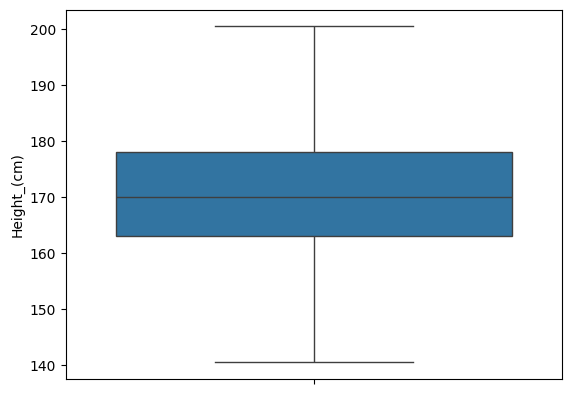

In [37]:
sns.boxplot(h_df['Height_(cm)'])
plt.show()

In [38]:
w_low=q1['Weight_(kg)']-(1.5*iqr['Weight_(kg)'])
w_high=q3['Weight_(kg)']+(1.5*iqr['Weight_(kg)'])

In [39]:
w_df=df.copy()
w_df['Weight_(kg)']=np.where(w_df['Weight_(kg)']>w_high,
                    w_high,
                    np.where(w_df['Weight_(kg)']<w_low,
                    w_low,
                    w_df['Weight_(kg)']
    )
)

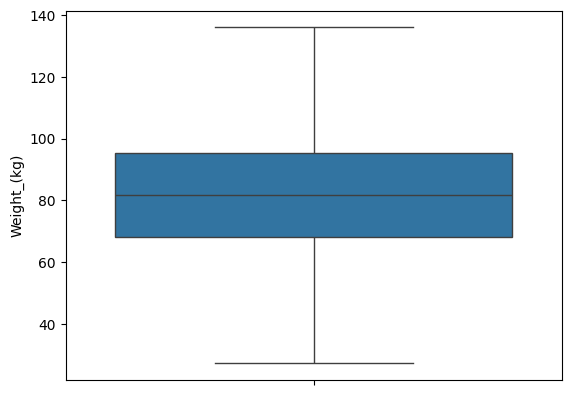

In [40]:
sns.boxplot(w_df['Weight_(kg)'])
plt.show()

In [41]:
b_low=q1['BMI']-(1.5*iqr['BMI'])
b_high=q3['BMI']+(1.5*iqr['BMI'])

In [42]:
b_df=df.copy()
b_df['BMI']=np.where(b_df['BMI']>b_high,
                    b_high,
                    np.where(b_df['BMI']<b_low,
                    b_low,
                    b_df['BMI']
    )
)

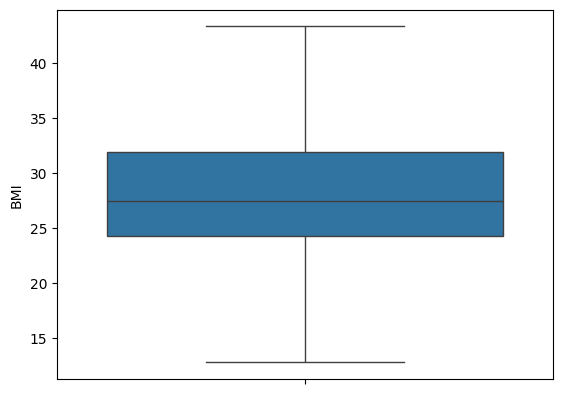

In [43]:
sns.boxplot(b_df['BMI'])
plt.show()

In [44]:
ac_low=q1['Alcohol_Consumption']-(1.5*iqr['Alcohol_Consumption'])
ac_high=q3['Alcohol_Consumption']+(1.5*iqr['Alcohol_Consumption'])

In [45]:
ac_df = df.copy()
ac_df['Alcohol_Consumption']=np.where(ac_df['Alcohol_Consumption']>ac_high,
                    ac_high,
                    np.where(ac_df['Alcohol_Consumption']<ac_low,
                    ac_low,
                    ac_df['Alcohol_Consumption']
    )
)

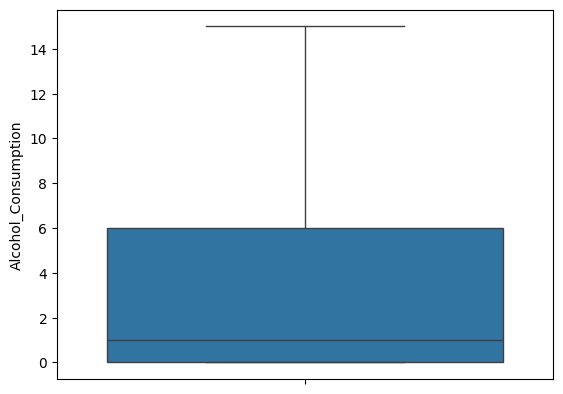

In [46]:
sns.boxplot(ac_df['Alcohol_Consumption'])
plt.show()

In [47]:
fc_low=q1['Fruit_Consumption']-(1.5*iqr['Fruit_Consumption'])
fc_high=q3['Fruit_Consumption']+(1.5*iqr['Fruit_Consumption'])

In [48]:
fc_df = df.copy()
fc_df['Fruit_Consumption']=np.where(fc_df['Fruit_Consumption']>fc_high,
                    fc_high,
                    np.where(fc_df['Fruit_Consumption']<fc_low,
                    fc_low,
                    fc_df['Fruit_Consumption']
    )
)

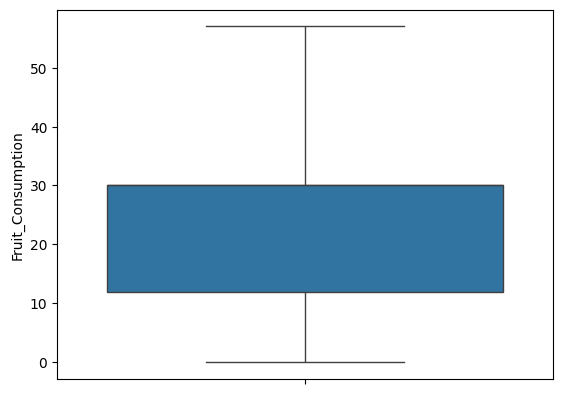

In [49]:
sns.boxplot(fc_df['Fruit_Consumption'])
plt.show()

In [50]:
gvc_low=q1['Green_Vegetables_Consumption']-(1.5*iqr['Green_Vegetables_Consumption'])
gvc_high=q3['Green_Vegetables_Consumption']+(1.5*iqr['Green_Vegetables_Consumption'])

In [51]:
gvc_df = df.copy()
gvc_df['Green_Vegetables_Consumption']=np.where(gvc_df['Green_Vegetables_Consumption']>gvc_high,
                    gvc_high,
                    np.where(gvc_df['Green_Vegetables_Consumption']<gvc_low,
                    gvc_low,
                    gvc_df['Green_Vegetables_Consumption']
    )
)

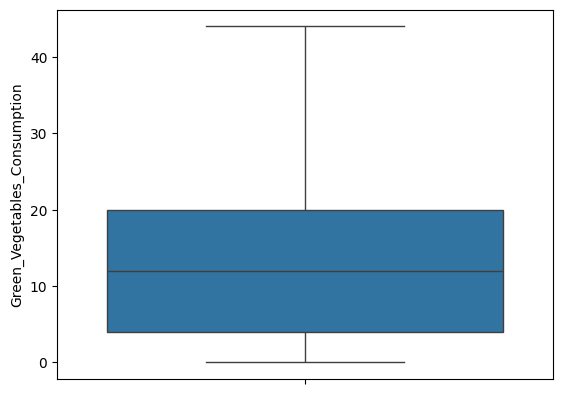

In [52]:
sns.boxplot(gvc_df['Green_Vegetables_Consumption'])
plt.show()

In [53]:
fpc_low=q1['FriedPotato_Consumption']-(1.5*iqr['FriedPotato_Consumption'])
fpc_high=q3['FriedPotato_Consumption']+(1.5*iqr['FriedPotato_Consumption'])

In [54]:
fpc_df = df.copy()
fpc_df['FriedPotato_Consumption']=np.where(fpc_df['FriedPotato_Consumption']>fpc_high,
                    fpc_high,
                    np.where(fpc_df['FriedPotato_Consumption']<fpc_low,
                    fpc_low,
                    fpc_df['FriedPotato_Consumption']
    )
)

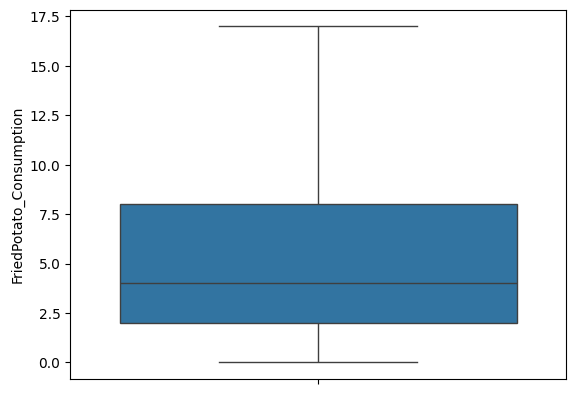

In [55]:
sns.boxplot(fpc_df['FriedPotato_Consumption'])
plt.show()

In [56]:
df.skew()

General_Health                 -0.155719
Checkup                        -2.167960
Exercise                       -1.317226
Heart_Disease                   3.074635
Skin_Cancer                     2.720821
Other_Cancer                    2.728010
Depression                      1.496364
Diabetes                        2.051147
Arthritis                       0.736087
Sex                             0.074774
Age_Category                   -0.261608
Height_(cm)                     0.015299
Weight_(kg)                     1.058099
BMI                             1.376452
Smoking_History                 0.384254
Alcohol_Consumption             1.885261
Fruit_Consumption               1.248447
Green_Vegetables_Consumption    2.415920
FriedPotato_Consumption         4.911907
dtype: float64

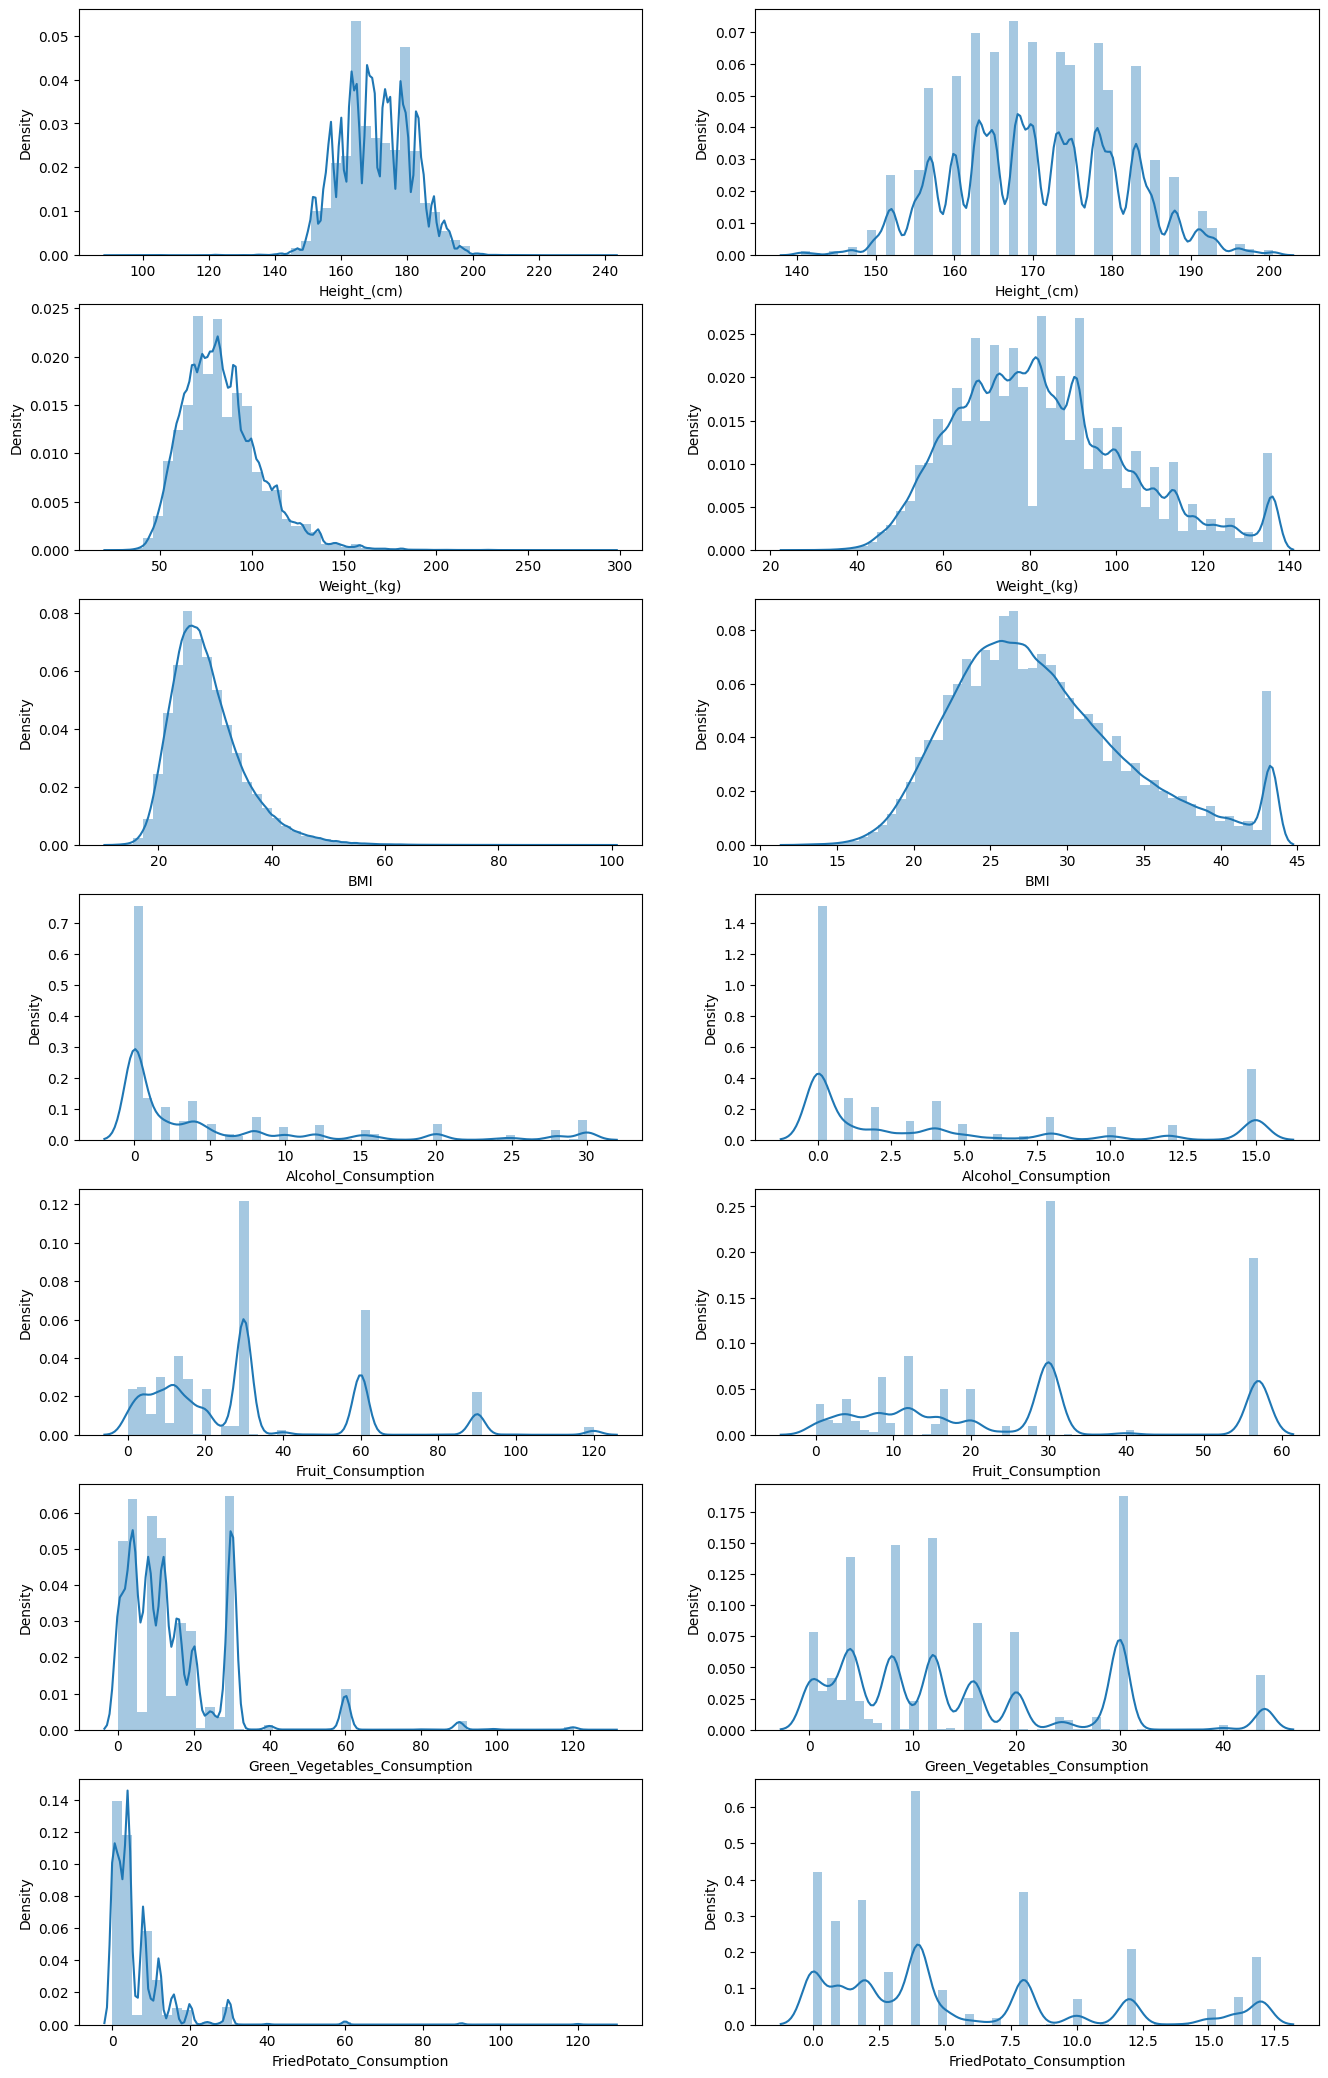

In [96]:
plt.figure(figsize=(16,30))

plt.subplot(8,2,1)
sns.distplot(df['Height_(cm)'])

plt.subplot(8,2,2)
sns.distplot(h_df['Height_(cm)'])

plt.subplot(8,2,3)
sns.distplot(df['Weight_(kg)'])

plt.subplot(8,2,4)
sns.distplot(w_df['Weight_(kg)'])

plt.subplot(8,2,5)
sns.distplot(df['BMI'])

plt.subplot(8,2,6)
sns.distplot(b_df['BMI'])

plt.subplot(8,2,7)
sns.distplot(df['Alcohol_Consumption'])

plt.subplot(8,2,8)
sns.distplot(ac_df['Alcohol_Consumption'])

plt.subplot(8,2,9)
sns.distplot(df['Fruit_Consumption'])

plt.subplot(8,2,10)
sns.distplot(fc_df['Fruit_Consumption'])

plt.subplot(8,2,11)
sns.distplot(df['Green_Vegetables_Consumption'])

plt.subplot(8,2,12)
sns.distplot(gvc_df['Green_Vegetables_Consumption'])

plt.subplot(8,2,13)
sns.distplot(df['FriedPotato_Consumption'])

plt.subplot(8,2,14)
sns.distplot(fpc_df['FriedPotato_Consumption'])

plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [60]:
x=df.drop('Heart_Disease',axis=1)

In [61]:
y=df['Heart_Disease']

In [62]:
x_scaled=scaler.fit_transform(x)

In [63]:
x_scaled = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaled

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.486453,-1.485784,-1.85601,-0.327997,-0.3273,-0.500730,-0.425469,1.433619,-0.963312,0.983087,-1.934170,-2.386099,-2.159627,1.210415,-0.621621,0.006661,0.059656,0.664362
1,1.155791,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,-0.963312,0.983087,-0.526833,-0.303608,-0.051636,-0.826163,-0.621621,0.006661,-1.012235,-0.267624
2,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,-0.963312,0.415468,-0.714478,0.227673,0.742501,-0.826163,-0.133842,-0.716876,-0.811255,1.130355
3,0.486453,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,1.038085,1.266897,0.880503,0.461456,0.015819,-0.826163,-0.621621,0.006661,0.997561,0.198369
4,-0.182885,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,1.550706,1.912549,0.227673,-0.652605,1.210415,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,-1.571200,-0.245366,-0.090908,0.064878,-0.826163,-0.133842,0.006661,-0.476289,-0.733617
308770,-0.852223,-0.505053,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,1.038085,0.699277,0.880503,-0.643740,-1.095666,-0.826163,0.353938,-0.596287,3.007357,-0.267624
308771,1.155791,-3.447247,0.53879,-0.327997,-0.3273,1.997086,3.715589,-0.697536,-0.963312,-1.287390,-1.277413,-1.047589,-0.603547,1.210415,-0.133842,0.408626,-0.476289,-0.267624
308772,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,0.699277,1.161970,-0.197258,-0.750723,-0.826163,-0.255786,0.006661,-0.208317,-0.733617


In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
print(vif)

          VIF                      Features
0    1.007080                General_Health
1    1.083140                       Checkup
2    1.105282                      Exercise
3    1.098198                   Skin_Cancer
4    1.073633                  Other_Cancer
5    1.095735                    Depression
6    1.116064                      Diabetes
7    1.239562                     Arthritis
8    2.040835                           Sex
9    1.452331                  Age_Category
10  18.718086                   Height_(cm)
11  67.031658                   Weight_(kg)
12  52.244399                           BMI
13   1.073563               Smoking_History
14   1.064750           Alcohol_Consumption
15   1.114540             Fruit_Consumption
16   1.103102  Green_Vegetables_Consumption
17   1.047016       FriedPotato_Consumption


In [67]:
x=df.drop('Heart_Disease',axis=1)
x=x.drop('Weight_(kg)',axis=1)

In [68]:
y=df['Heart_Disease']

In [69]:
x_scaler=scaler.fit_transform(x)

In [70]:
x_scaler = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaler

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.486453,-1.485784,-1.85601,-0.327997,-0.3273,-0.500730,-0.425469,1.433619,-0.963312,0.983087,-1.934170,-2.159627,1.210415,-0.621621,0.006661,0.059656,0.664362
1,1.155791,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,-0.963312,0.983087,-0.526833,-0.051636,-0.826163,-0.621621,0.006661,-1.012235,-0.267624
2,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,-0.963312,0.415468,-0.714478,0.742501,-0.826163,-0.133842,-0.716876,-0.811255,1.130355
3,0.486453,0.475679,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,1.038085,1.266897,0.880503,0.015819,-0.826163,-0.621621,0.006661,0.997561,0.198369
4,-0.182885,0.475679,-1.85601,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,1.550706,1.912549,-0.652605,1.210415,-0.621621,-0.877663,-0.744262,-0.733617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,-1.571200,-0.245366,0.064878,-0.826163,-0.133842,0.006661,-0.476289,-0.733617
308770,-0.852223,-0.505053,0.53879,-0.327997,-0.3273,-0.500730,2.335236,-0.697536,1.038085,0.699277,0.880503,-1.095666,-0.826163,0.353938,-0.596287,3.007357,-0.267624
308771,1.155791,-3.447247,0.53879,-0.327997,-0.3273,1.997086,3.715589,-0.697536,-0.963312,-1.287390,-1.277413,-0.603547,1.210415,-0.133842,0.408626,-0.476289,-0.267624
308772,1.155791,0.475679,0.53879,-0.327997,-0.3273,-0.500730,-0.425469,-0.697536,1.038085,0.699277,1.161970,-0.750723,-0.826163,-0.255786,0.006661,-0.208317,-0.733617


In [71]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['Features']=x.columns
print(vif)

         VIF                      Features
0   1.006912                General_Health
1   1.082830                       Checkup
2   1.105218                      Exercise
3   1.098178                   Skin_Cancer
4   1.073470                  Other_Cancer
5   1.095310                    Depression
6   1.116039                      Diabetes
7   1.239503                     Arthritis
8   2.039615                           Sex
9   1.451183                  Age_Category
10  1.994251                   Height_(cm)
11  1.108470                           BMI
12  1.073562               Smoking_History
13  1.064593           Alcohol_Consumption
14  1.114332             Fruit_Consumption
15  1.103070  Green_Vegetables_Consumption
16  1.046948       FriedPotato_Consumption


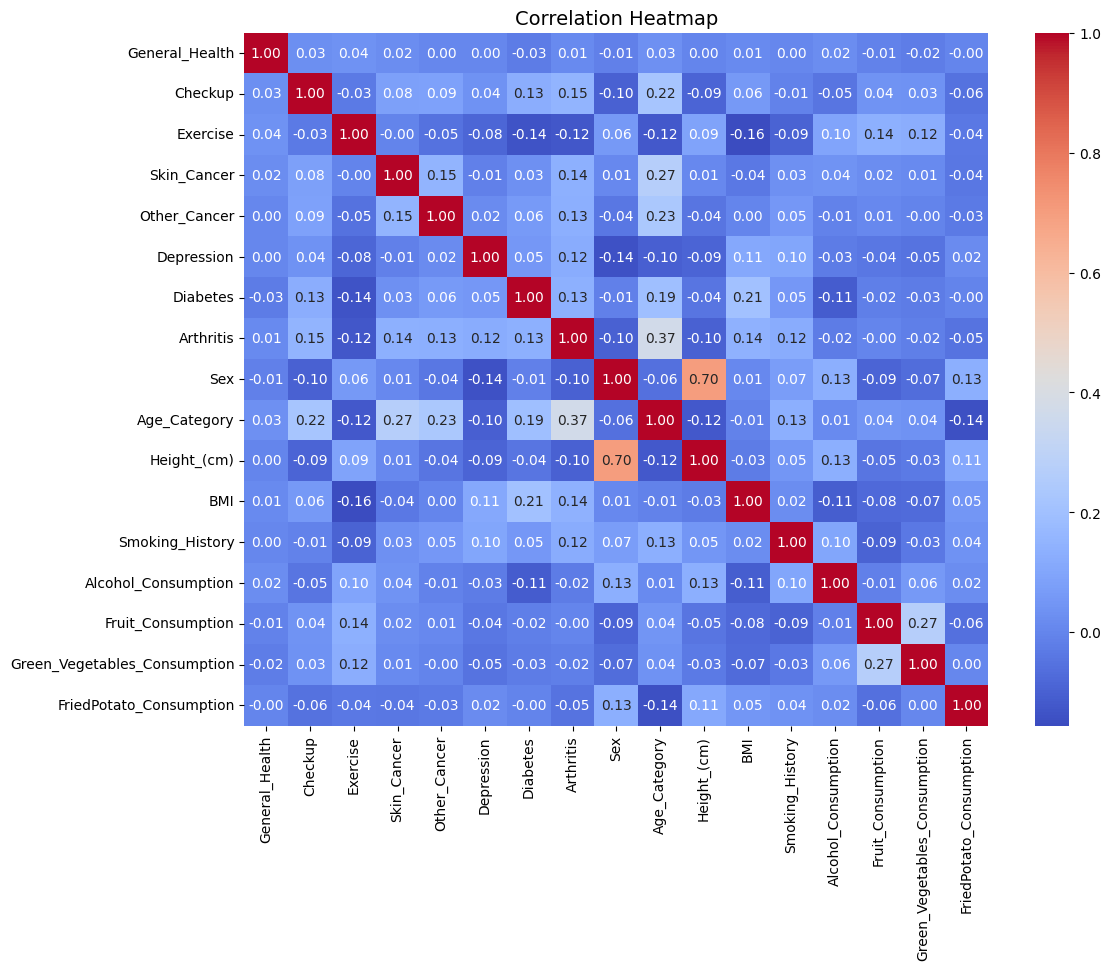

In [73]:
plt.figure(figsize=(12, 9))
sns.heatmap(x_scaler.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [100]:
x_train.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
241448,2,4,1,0,0,0,0,0,0,7,160,33.66,1,0,30,4,2
44734,2,3,1,1,1,0,0,0,0,8,168,21.95,0,0,60,12,4
293228,2,4,1,0,0,0,0,0,1,11,178,22.53,0,0,30,8,1
27956,0,4,1,0,0,0,0,0,0,8,163,20.25,1,28,60,30,4
104195,2,4,0,0,0,0,2,1,1,9,180,37.66,1,0,60,8,8


In [101]:
x_test.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
112130,0,3,1,0,0,0,0,0,0,7,163,23.00,1,0,20,4,16
95666,4,4,1,0,0,0,1,1,0,10,155,30.61,1,0,30,40,0
206006,0,4,1,0,0,0,0,0,0,6,170,20.36,0,0,30,30,0
280617,4,4,1,0,0,0,0,0,0,12,157,26.52,0,0,60,4,3
148564,4,4,1,0,0,0,0,0,0,11,160,31.00,0,2,30,16,7


In [102]:
y_train.head()

241448    0
44734     0
293228    1
27956     0
104195    0
Name: Heart_Disease, dtype: int64

In [79]:
y_test.head()

112130    0
95666     1
206006    0
Name: Heart_Disease, dtype: int64

In [80]:
#checking shape of x_train:-
x_train.shape

(247019, 17)

In [81]:
#checking shape of x_test:-
x_test.shape

(61755, 17)

In [82]:
#checking shape of y_train:-
y_train.shape

(247019,)

In [83]:
#checking shape of y_test:-
y_test.shape

(61755,)

In [84]:
# Sampling

In [85]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [ ]:
# Logistic Regression:-

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
report = classification_report(y_test, y_pred)
report

In [ ]:
# KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [185]:
y_pred = knn.predict(x_test)

In [186]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9100315763905756

In [ ]:
#DTC

In [187]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [188]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = dt.predict(x_test)

In [189]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9100315763905756

In [190]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56007,   670],
       [ 4886,   192]])

In [192]:
report = classification_report(y_test, y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.95     56677\n           1       0.22      0.04      0.06      5078\n\n    accuracy                           0.91     61755\n   macro avg       0.57      0.51      0.51     61755\nweighted avg       0.86      0.91      0.88     61755\n'

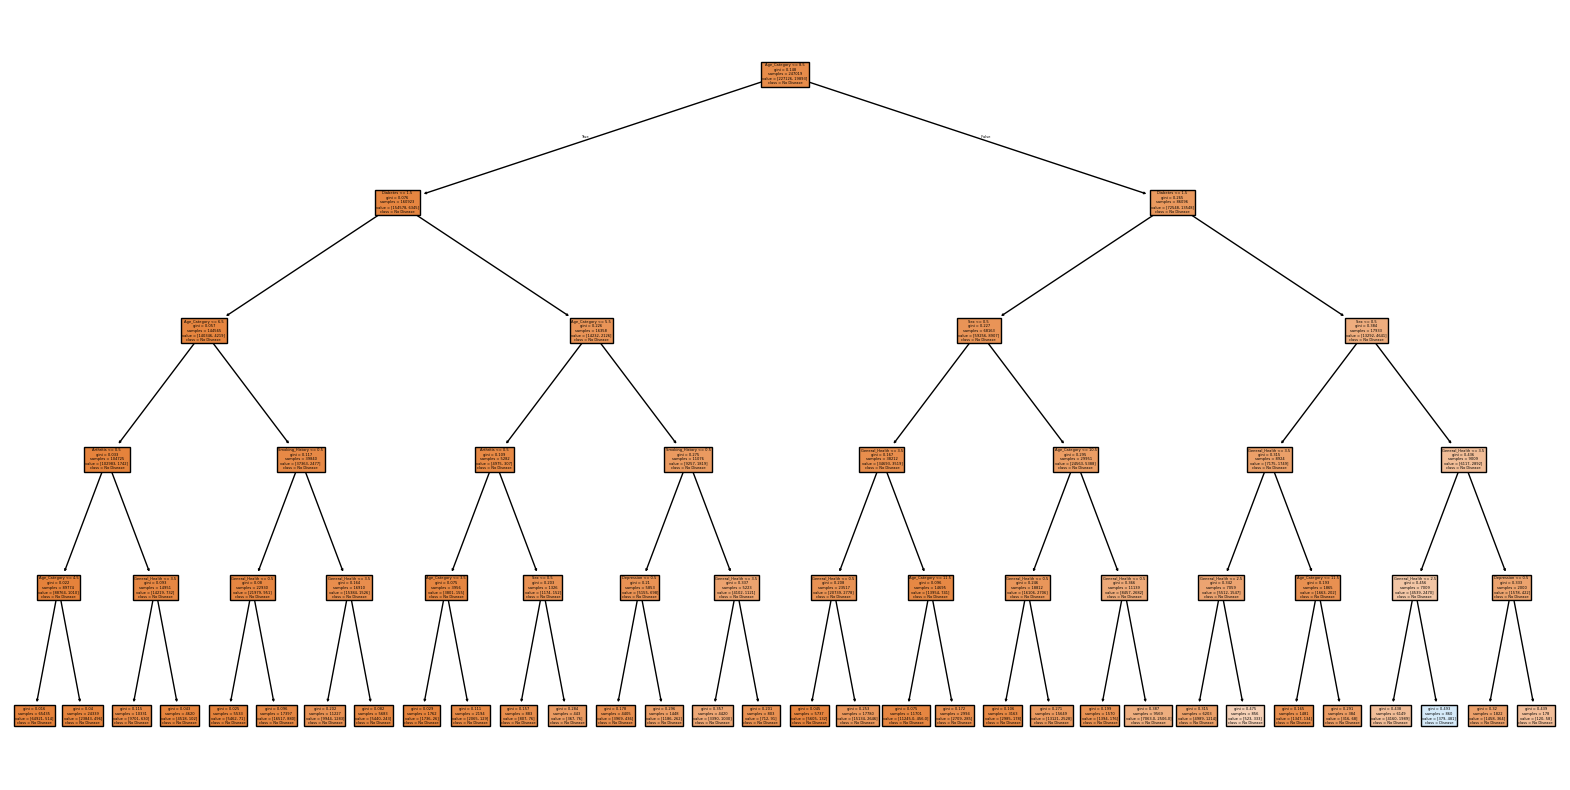

In [193]:
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()